# Load Covid dataset

## Load CSV

In [1]:
import pandas as pd

covid_data = pd.read_csv('../lung_pollution/data/RKI_corona_landskreise.csv')

covid_data.shape

(411, 47)

In [2]:
covid_data.columns

Index(['OBJECTID', 'ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS', 'GEN', 'BEZ',
       'IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G',
       'FK_S3', 'NUTS', 'RS_0', 'AGS_0', 'WSK', 'EWZ', 'KFL', 'DEBKG_ID',
       'Shape__Area', 'Shape__Length', 'death_rate', 'cases', 'deaths',
       'cases_per_100k', 'cases_per_population', 'BL', 'BL_ID', 'county',
       'last_update', 'cases7_per_100k', 'recovered', 'EWZ_BL',
       'cases7_bl_per_100k', 'cases7_bl', 'death7_bl', 'cases7_lk',
       'death7_lk', 'cases7_per_100k_txt', 'AdmUnitId'],
      dtype='object')

In [3]:
covid_data = covid_data[['BL','county','EWZ','Shape__Area', 'death_rate', 'cases', 'deaths','cases_per_100k']]
covid_data.head()

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k
0,Schleswig-Holstein,SK Flensburg,89934,4.918293e+07,1.223721,3187,39,3543.709832
1,Schleswig-Holstein,SK Kiel,246601,1.122314e+08,1.409469,8301,117,3366.166398
2,Schleswig-Holstein,SK Lübeck,215846,2.116771e+08,1.392355,7613,106,3527.051694
3,Schleswig-Holstein,SK Neumünster,79905,7.140224e+07,0.889996,2809,25,3515.424567
4,Schleswig-Holstein,LK Dithmarschen,133251,1.425511e+09,1.915323,2976,57,2233.379112


## Feature engineering: create deaths/100k column

In [4]:
covid_data['deaths_per_100k'] = covid_data['deaths']/covid_data['EWZ']*100_000
covid_data.head()

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
0,Schleswig-Holstein,SK Flensburg,89934,4.918293e+07,1.223721,3187,39,3543.709832,43.365134
1,Schleswig-Holstein,SK Kiel,246601,1.122314e+08,1.409469,8301,117,3366.166398,47.445063
2,Schleswig-Holstein,SK Lübeck,215846,2.116771e+08,1.392355,7613,106,3527.051694,49.109087
3,Schleswig-Holstein,SK Neumünster,79905,7.140224e+07,0.889996,2809,25,3515.424567,31.287153
4,Schleswig-Holstein,LK Dithmarschen,133251,1.425511e+09,1.915323,2976,57,2233.379112,42.776414


## Merge all Berlin 'counties' to one (to match APexpose)

Covid dataset has 11 Berlin counties, but air pollution dataset only has 1 berlin county > 
collapse 11 berlin counties into one, taking into account whether to take the sum or the mean per numerical feature

In [5]:
berlin = covid_data[covid_data["BL"] == 'Berlin']
berlin

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
399,Berlin,SK Berlin Reinickendorf,259169,8.943665e+07,1.618289,19465,315,7510.543313,121.542314
400,Berlin,SK Berlin Charlottenburg-Wilmersdorf,315393,6.477450e+07,1.568608,20464,321,6488.412869,101.777782
401,Berlin,SK Berlin Treptow-Köpenick,272429,1.680052e+08,1.689394,13200,223,4845.299142,81.856190
402,Berlin,SK Berlin Pankow,403607,1.033630e+08,1.068934,21049,225,5215.221738,55.747299
403,Berlin,SK Berlin Neukölln,318128,4.499687e+07,1.522467,28375,432,8919.365790,135.794397
404,Berlin,SK Berlin Lichtenberg,291622,5.219800e+07,1.697550,16082,273,5514.673104,93.614336
405,Berlin,SK Berlin Marzahn-Hellersdorf,273676,6.191477e+07,1.768566,14475,256,5289.100981,93.541268
406,Berlin,SK Berlin Spandau,238922,9.294042e+07,1.444666,18551,268,7764.458694,112.170499
407,Berlin,SK Berlin Steglitz-Zehlendorf,290866,1.026872e+08,2.656722,16223,431,5577.482415,148.178199
408,Berlin,SK Berlin Mitte,374232,3.945211e+07,1.156393,30353,351,8110.744137,93.792086


In [6]:
covid_data['county'][399] = 'Berlin'
covid_data.loc[399] 

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/360524747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['county'][399] = 'Berlin'


BL                          Berlin
county                      Berlin
EWZ                         259169
Shape__Area        89436651.129883
death_rate                1.618289
cases                        19465
deaths                         315
cases_per_100k         7510.543313
deaths_per_100k         121.542314
Name: 399, dtype: object

In [7]:
berlin_sum = berlin[['Shape__Area', 'cases', 'deaths']].sum()
berlin_sum

Shape__Area    8.933202e+08
cases          2.428130e+05
deaths         3.759000e+03
dtype: float64

In [8]:
berlin_average = berlin[['death_rate','cases_per_100k', 'deaths_per_100k']].mean()
berlin_average

death_rate            1.591636
cases_per_100k     6640.688066
deaths_per_100k     103.703091
dtype: float64

In [9]:
covid_data['cases'][399] = berlin_sum.cases
covid_data['Shape__Area'][399] = berlin_sum.Shape__Area
covid_data['deaths'][399] = berlin_sum.deaths

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/648295955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['cases'][399] = berlin_sum.cases
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/648295955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Shape__Area'][399] = berlin_sum.Shape__Area
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/648295955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [10]:
covid_data['death_rate'][399] = berlin_average.death_rate
covid_data['cases_per_100k'][399] = berlin_average.cases_per_100k
covid_data['deaths_per_100k'][399] = berlin_average.deaths_per_100k

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/3332388361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['death_rate'][399] = berlin_average.death_rate
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/3332388361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['cases_per_100k'][399] = berlin_average.cases_per_100k
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58719/3332388361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [11]:
covid_data.drop(index=[400,401,402,403,404,405,406,407,408,409,410], axis=0, inplace=True)

In [12]:
covid_data.shape

(400, 9)

# Load APexpose air pollution dataset

## Load data

In [13]:
import chardet
with open("../lung_pollution/data/APExpose.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.717512331990768, 'language': ''}

In [14]:
import pandas as pd
county_names = pd.read_csv("../lung_pollution/data/APExpose.csv",
                             sep=';',
                             decimal='.',
                            encoding = 'Windows-1252') # needed special encoder to be able to read csv
county_names = county_names[['county']]
county_names

,county
0,SK Freiburg i.Breisgau
1,LK Dillingen a.d.Donau
2,SK NŸrnberg
3,LK Neumarkt i.d.OPf.
4,SK Rosenheim
...,...
12055,LK Rhein-Pfalz-Kreis
12056,SK Trier
12057,LK Saalekreis
12058,LK Wittenberg


In [15]:
pollution_data = pd.read_csv("../lung_pollution/data/pollution_data.csv",
                             sep=',',
                             decimal='.',
                            )
pollution_data.head()
pollution_data['county'] = county_names
pollution_data

,Unnamed: 0,kreis,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,...,PM10_annualMean,PM10_daysOver50,PM2.5_annualMean,kreis_code,scenario,ISO_code,Kreis_Scluessel,Lon,Lat,county
0,0,Freiburg im Breisgau,2019,15.757110,0.000000,6.600048,55.451900,6.000000,83.706030,218.500000,...,12.473230,2.000000,8.984028,12,remote,DE.BW.FB,8311,7.818076,47.992523,SK Freiburg i.Breisgau
1,1,Dillingen an der Donau,2019,18.953264,0.004595,9.519503,55.639033,3.802370,78.827799,180.314018,...,17.288283,5.366906,12.952426,68,remote,DE.BY.DD,9773,10.527764,48.596404,LK Dillingen a.d.Donau
2,2,NÃ¼rnberg,2019,25.380070,0.000000,12.515380,45.320180,0.000000,73.695480,160.340000,...,15.367712,4.895583,11.517540,107,remote,DE.BY.NR,9564,11.082755,49.436211,SK NŸrnberg
3,3,Neumarkt in der Oberpfalz,2019,15.709243,0.003532,8.176603,52.094916,2.182587,76.590555,179.684101,...,16.092153,4.895583,12.269832,110,remote,DE.BY.NO,9373,11.566558,49.215961,LK Neumarkt i.d.OPf.
4,4,Rosenheim,2019,17.524585,0.004127,8.682464,52.593257,2.410346,76.905136,179.772674,...,16.414083,4.895583,12.485468,122,remote,DE.BY.RH,9163,12.108725,47.844378,SK Rosenheim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,12055,Rhein-Pfalz-Kreis,2014,16.294522,0.005650,10.040756,48.318206,0.475016,74.137229,178.877820,...,16.962235,8.225207,12.778194,323,urban,DE.RP.RZ,7338,8.360681,49.416650,LK Rhein-Pfalz-Kreis
12056,12056,Trier,2014,15.513458,0.004825,8.853443,41.981940,0.000000,53.925600,76.083530,...,17.367278,8.199563,13.013627,328,urban,DE.RP.TI,7211,6.655051,49.762939,SK Trier
12057,12057,Saalekreis,2014,17.547591,0.006972,9.026354,51.263981,1.811047,76.007326,179.476220,...,17.834840,7.289535,13.329265,349,urban,DE.ST.SL,15088,11.865474,51.425671,LK Saalekreis
12058,12058,Wittenberg,2014,13.177420,0.000000,7.047741,50.177210,2.000000,74.537810,167.088500,...,22.753030,15.000000,13.932308,352,urban,DE.ST.WT,15091,12.701588,51.820140,LK Wittenberg


In [16]:
pollution_data.drop(columns='Unnamed: 0', inplace=True)
pollution_data.drop(columns='kreis', inplace=True)

## Keep only 'average' scenario (combines remote and rural)

In [17]:
pollution_data.shape

(12060, 19)

In [18]:
pollution_data = pollution_data[pollution_data.scenario == 'average']
pollution_data.shape

(4020, 19)

## Keep relevant features only and sort by year

In [19]:
pollution_data.columns

Index(['year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean', 'kreis_code', 'scenario',
       'ISO_code', 'Kreis_Scluessel', 'Lon', 'Lat', 'county'],
      dtype='object')

In [20]:
pollution_data = pollution_data[['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean']]

In [21]:
pollution_data.sort_values('year', axis=0, ascending=True,inplace=True,ignore_index=True)
pollution_data

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2.5_annualMean
0,LK Greiz,2010,20.189280,0.000000,6.925885,42.771670,1.682244,75.952011,179.500043,162.232504,24.287540,22.000000,18.507110
1,LK Gro§-Gerau,2010,26.785240,0.000000,11.275620,40.695500,0.688502,74.386456,179.005127,161.350783,22.095010,3.000000,13.405547
2,LK Main-Taunus-Kreis,2010,18.270625,0.007030,12.659486,48.589364,0.688782,74.386896,179.005266,161.351032,17.935028,8.351986,13.320326
3,SK Schwerin,2010,16.688684,0.006174,8.444366,50.869312,1.618849,75.852137,179.468470,162.176255,17.479160,6.427313,13.012473
4,SK Braunschweig,2010,16.100240,0.000000,2.360461,50.885470,1.898947,76.293408,179.607968,162.424778,19.254090,15.000000,13.773945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,LK Offenbach,2019,16.879588,0.006277,9.627029,51.441394,1.852220,76.219794,179.584696,162.383319,16.609082,5.056900,12.486517
4016,LK Northeim,2019,7.093503,0.000000,0.496811,56.630960,3.000000,77.735580,189.064000,157.677300,11.345170,1.000000,12.755891
4017,LK WolfenbŸttel,2019,15.339071,0.005444,8.382882,49.753871,1.163823,75.135283,179.241852,161.772523,16.025205,5.035504,12.145846
4018,LK Sonneberg,2019,5.570615,0.000000,1.397936,68.816120,12.000000,84.569680,165.330000,157.675700,8.797225,1.000000,12.623563


## Clean AP expose county name column to match Covid dataset

In [22]:
## Some funny characters present in county names of APExpose dataset
## Replace those characters with equivalent German character to match Covid dataset and be able to merge

pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('Ÿ','ü'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('š','ö'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('§','ß'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('Š','ä'))

In [23]:
#Check datatypes
pollution_data.dtypes

county                    object
year                       int64
NO2_annualMean           float64
NO2_hrOver200            float64
NO_annualMean            float64
O3_annualMean            float64
O3_daysOver120           float64
O3_dailyMaxAnnualMean    float64
O3_dailyHourlyMax        float64
O3_daily8HrMax           float64
PM10_annualMean          float64
PM10_daysOver50          float64
PM2.5_annualMean         float64
dtype: object

## Drop counties present in APexpore but not Covid

Eisenach (wartburgkreis), Osterode am Harz (Göttingen) present in AP dataset but not in Covid dataset (because they were merged with another county after 2019): drop those rows for all time points

In [24]:
pollution_data.shape

(4020, 13)

In [25]:
pollution_data = pollution_data[pollution_data.county != 'Eisenach']
pollution_data.shape

(4010, 13)

In [26]:
pollution_data = pollution_data[pollution_data.county != 'Osterode am Harz']
pollution_data.shape

(4000, 13)

## Sort AP data per county and year

In [27]:
pollution_data.sort_values(['county','year'], axis=0, ascending=True,inplace=True,ignore_index=True)
pollution_data.head

<bound method NDFrame.head of                    county  year  NO2_annualMean  NO2_hrOver200  NO_annualMean  \
0                  Berlin  2010       21.330970            0.0       4.689645   
1                  Berlin  2011       21.107920            0.0       5.591758   
2                  Berlin  2012       20.656000            0.0       5.372472   
3                  Berlin  2013       19.166320            0.0       4.376160   
4                  Berlin  2014       20.466660            0.0      15.755060   
...                   ...   ...             ...            ...            ...   
3995  StädteRegion Aachen  2015       19.503560            0.0      18.259300   
3996  StädteRegion Aachen  2016       19.119410            0.0      20.256560   
3997  StädteRegion Aachen  2017       19.371040            0.0      20.455340   
3998  StädteRegion Aachen  2018       18.783950            0.0      18.301830   
3999  StädteRegion Aachen  2019        8.702983            0.0       0.743928  

# Merge APexpose and Covid datasets

In [28]:
merge_df = pollution_data.merge(covid_data, how = 'inner', on='county')
merge_df.shape

(4000, 21)

In [29]:
merge_df.head

<bound method NDFrame.head of                    county  year  NO2_annualMean  NO2_hrOver200  NO_annualMean  \
0                  Berlin  2010       21.330970            0.0       4.689645   
1                  Berlin  2011       21.107920            0.0       5.591758   
2                  Berlin  2012       20.656000            0.0       5.372472   
3                  Berlin  2013       19.166320            0.0       4.376160   
4                  Berlin  2014       20.466660            0.0      15.755060   
...                   ...   ...             ...            ...            ...   
3995  StädteRegion Aachen  2015       19.503560            0.0      18.259300   
3996  StädteRegion Aachen  2016       19.119410            0.0      20.256560   
3997  StädteRegion Aachen  2017       19.371040            0.0      20.455340   
3998  StädteRegion Aachen  2018       18.783950            0.0      18.301830   
3999  StädteRegion Aachen  2019        8.702983            0.0       0.743928  

In [226]:
merge_df.to_csv('covid_pollution_clean.csv')

!!!!!! Lon and Lat is not what we need - merge from Chris dataset

## Rename PM2.5 to PM2_5

In [80]:
merge_df = merge_df.rename(columns={'PM2.5_annualMean': 'PM2_5_annualMean'})

In [81]:
merge_df.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k'],
      dtype='object')

In [82]:
merge_df.dtypes

county                    object
year                       int64
NO2_annualMean           float64
NO2_hrOver200            float64
NO_annualMean            float64
O3_annualMean            float64
O3_daysOver120           float64
O3_dailyMaxAnnualMean    float64
O3_dailyHourlyMax        float64
O3_daily8HrMax           float64
PM10_annualMean          float64
PM10_daysOver50          float64
PM2_5_annualMean         float64
BL                        object
EWZ                        int64
Shape__Area              float64
death_rate               float64
cases                      int64
deaths                     int64
cases_per_100k           float64
deaths_per_100k          float64
dtype: object

In [121]:
merge_df.to_csv('clean_merged_dataset_covid_pollution.csv')

# Covid & Air pollution - quick correlation check

In [83]:
# keep useful features only
features_latest_timepoint = merge_df.iloc[0:399][['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean']]

In [84]:
targets_latest_timepoint = merge_df.iloc[0:399][['cases_per_100k', 'deaths_per_100k', 'deaths', 'cases']]

In [85]:
#numerical features
feature_list = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean']

In [86]:
target_list = ['cases_per_100k', 'deaths_per_100k', 'deaths', 'cases']

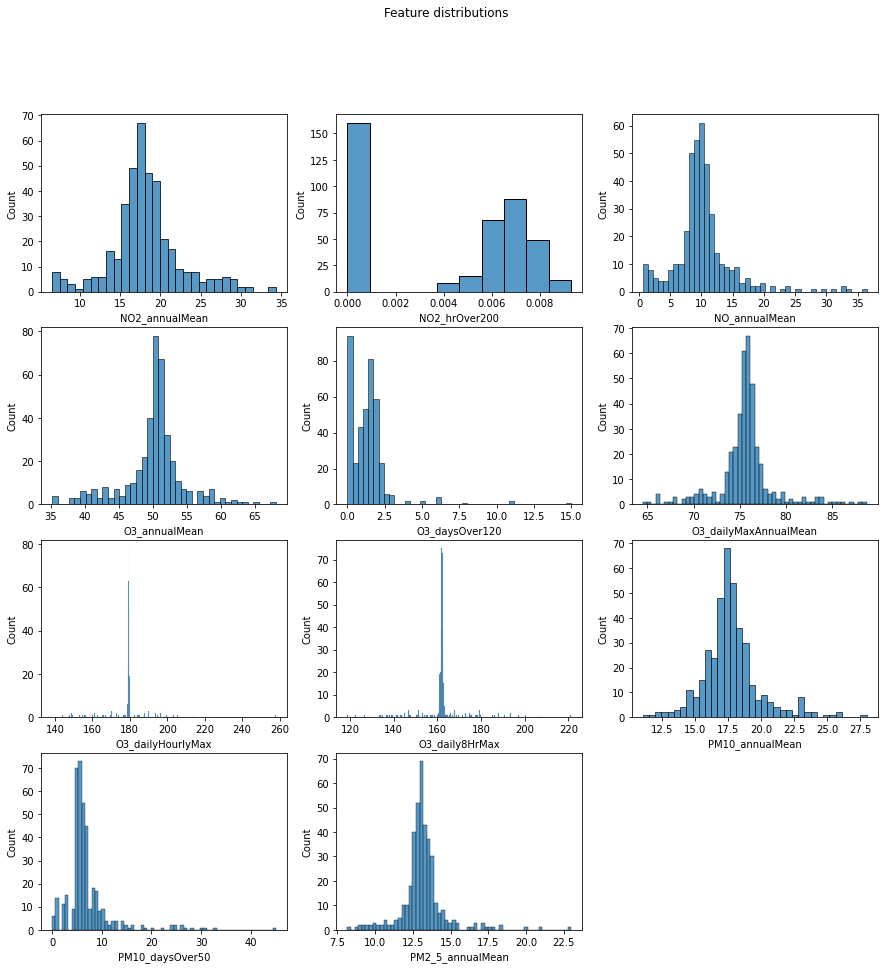

In [87]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.histplot(features_latest_timepoint[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

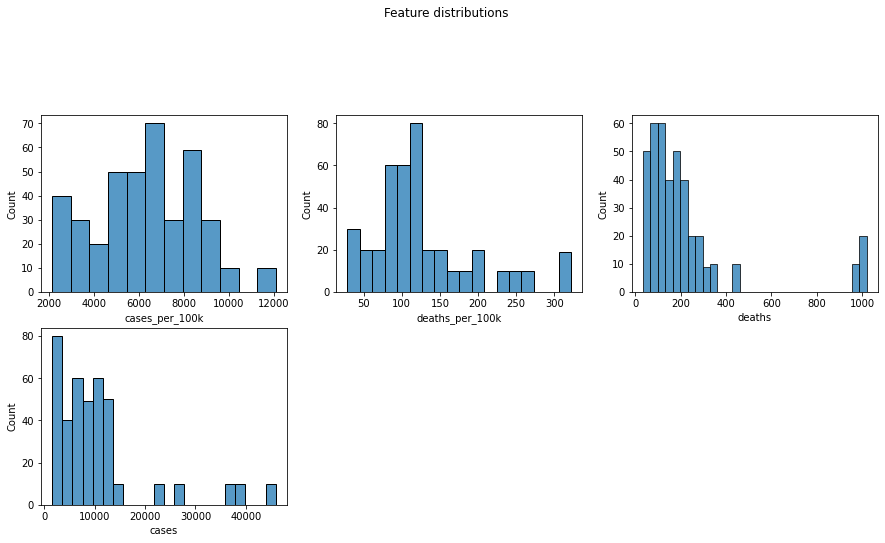

In [88]:
#check distribution of targets

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))

for i, feature in enumerate(target_list):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.histplot(targets_latest_timepoint[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

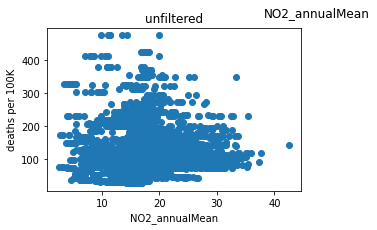

In [91]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.scatter(merge_df['NO2_annualMean'], merge_df['deaths_per_100k'])
plt.xlabel("NO2_annualMean")
plt.ylabel("deaths per 100K")
plt.title('unfiltered')
# Global figure methods
plt.suptitle('NO2_annualMean')
plt.show()

PROBLEM: for each pollutant, about half of the counties don't have measurement station and instead impute values - they cluster around 0, we might want to find a better way of imputing or dropping those data

In [92]:
import statsmodels.formula.api as smf

In [94]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_hrOver200', data = merge_df).fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.226
Date:                Tue, 23 Nov 2021   Prob (F-statistic):             0.0726
Time:                        16:32:03   Log-Likelihood:                -22477.
No. Observations:                3990   AIC:                         4.496e+04
Df Residuals:                    3988   BIC:                         4.497e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       125.9325      1.078    116.793      0.000     123.818     128.046
NO2_hrOver200   -32.1198     17.883     -1.796      0.073     -67.180       2.941
==============================================================================
Omnibus:                     1399.750   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5149.806
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                       7.349   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

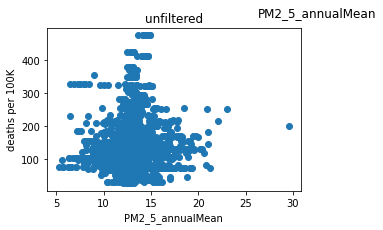

In [96]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.scatter(merge_df['PM2_5_annualMean'], merge_df['deaths_per_100k'])
plt.xlabel("PM2_5_annualMean")
plt.ylabel("deaths per 100K")
plt.title('unfiltered')
# Global figure methods
plt.suptitle('PM2_5_annualMean')
plt.show()

In [97]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = merge_df).fit()

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.62
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.66e-05
Time:                        16:32:29   Log-Likelihood:                -22471.
No. Observations:                3990   AIC:                         4.495e+04
Df Residuals:                    3988   BIC:                         4.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           86.5343      9.671      8.948      0.000      67.574     105.494
PM2_5_annualMean     2.9930      0.734      4.076      0.000       1.553       4.432
==============================================================================
Omnibus:                     1406.057   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5180.500
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                       7.358   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""